# Artificial vision 
## Master 2 IA university of Msila
### Author Ghemougui abdessettar

LAB 1 Introduction to OpenCV

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aguemoug/cv_ia/HEAD?filepath=tp_1_introduction_cv.ipynb)


## Loading images

Let’s start with the simple task of reading an image using OpenCV.

In [1]:
# Importing the OpenCV, numpy and matplotlib packages
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt # w use plt in rather than pyplot 

# Reading the image using imread() function
img = cv.imread('image/cofee.jpg')
  
# Extracting the height and width of an image
h, w = img.shape[:2]
print("h = {},  Width = {}".format(h, w))


h = 159,  Width = 318


## Show an image in the notebook using matplotlib imshow


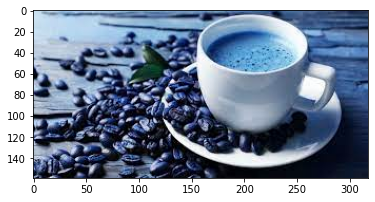

In [2]:
plt.imshow(img)
plt.show()

## OpenCv stores images in BGR order
opencv stores the image in BGR order, and matplotlib expectes them in RGB

to fix this we need to swap the channales when we need to show the image.


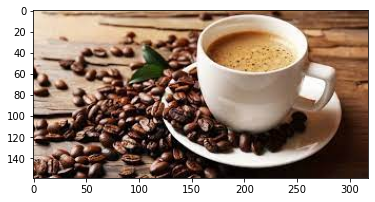

In [3]:
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


## we can define a function to show opencv images in notbooks


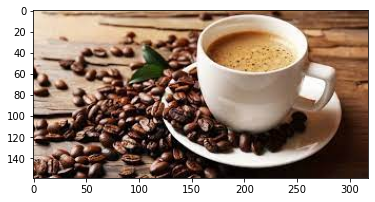

In [4]:

def cv_show(image):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

cv_show(img)


## Extracting the RGB values of a pixel

Note – OpenCV arranges the channels in BGR order. 

So the 0th value will correspond to Blue pixel and not Red.

Note - image[50,20] is the pixel at row 50 and column 20
As coordonates this is the pixel at position (20,50) 


In [6]:
# Get the color of the pixel at position (50,20) 
# in the matrix this is at row 20 column 50
(B, G, R) = img[20, 50]
  
print("R = {}, G = {}, B = {}".format(R, G, B))
# Get the Red value of the pixel at position (60,100)
B = img[100, 60, 2]
print("B = {}".format(B))



R = 239, G = 214, B = 184
B = 59


## Extracting the Region of Interest (ROI) (croping)
this can be done with numpy slicing


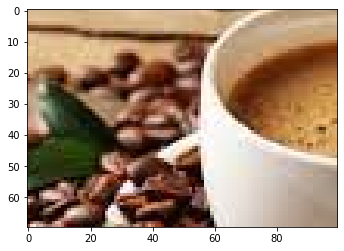

In [10]:
# by slicing the pixels of the image
roi = img[10 : 80, 100 : 200]
cv_show(roi)

## Resizing the Image
Resizing an image means changing its dimensions (width,height), To resize an image, OpenCV provides **cv2.resize()** function.


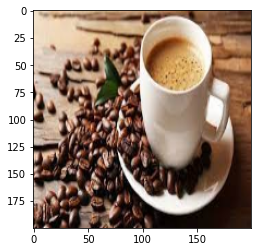

In [12]:
resized = cv.resize(img, (200, 200))
cv_show(resized)

## Resizing an image while prezerving the aspect ratio

The **aspect ratio** of an image is the ratio of its width to its height. It is commonly expressed as two numbers separated by a colon, as in 16:9.

To resize an image while preserving its aspect ratio we can fix aither the desired width or height and solve for the other dimention.


Since $\frac{w_1}{h_1}=\frac{w_2}{h_2}$

We can fix $w_2$ and solve for $h_2$ like this :


$w_2=h_2\frac{w_1}{h_1}$



159 318
ratio :  2.0
old dimentions (318, 159)
new dimentions (600, 300)


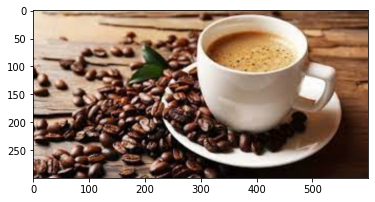

In [29]:
# Calculating the ratio
h,w,_ = img.shape
print(h,w)
aspect_ratio =  w/h
print('ratio : ',aspect_ratio)

# the target height is 300
h2=300
w2=int(h2*aspect_ratio)

# we need to convert the result to int
# Creating a tuple containing width and height

print('old dimentions',(w,h))
print('new dimentions',(w2,h2))
# Resizing the image
# oepncv resize function expects the new dimentions in (w,h) order
resize_aspect = cv.resize(img, (w2,h2))
cv_show(resize_aspect)

# Scaling
we can write a function that rescales an image by a factor


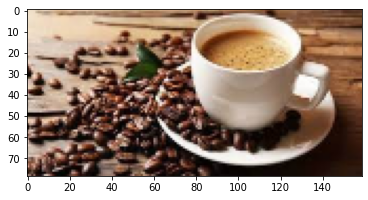

In [35]:
def scale_image(image,factor):
    h,w,_=image.shape
    new_dim=(int(w*factor),int(h*factor))
    return cv.resize(image,new_dim)

cv_show(scale_image(img,.5))

# Drawing in opencv
line   **cv.line**(image, start_point, end_point, color[, thickness) -> 	image

rectangle  **cv.rectangle**(image, start_point, end_point, color, thickness) -> image


circle **cv.circle**(image, center, radius, color[, thickness[, lineType[, shift]]]	) -> 	image


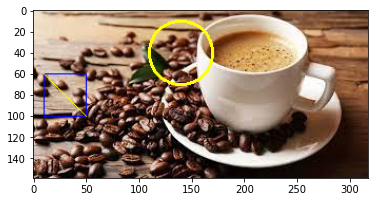

In [55]:
# We are copying the original image, as drawing is an in-place operation.
img_copy = img.copy()
  
# Using the rectangle() function to create a rectangle.
cv.rectangle(img_copy, (10, 60),(50, 100), (255, 0, 0), thickness=1)
cv.line(img_copy, (10, 60),(50, 100), (11, 255, 255), thickness=1)
cv.circle(	img_copy, (140,40), 30, (11, 255, 255),thickness=2) 
cv_show(img_copy)


## Creating a blanc grayscale image and drawing on it
to create an image we simply create a numpy array

Lets create a 300x300 grayscale image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


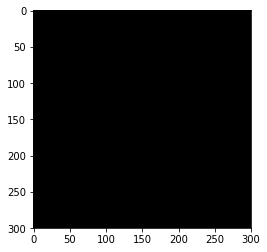

In [46]:

# np.zeros creates an array filled with zeros
blanc = np.zeros((300,300),dtype=np.uint8)
print(blanc)
cv_show(blanc)

we can use fill function to fill the matrix (image) with a value

[[111 111 111 ... 111 111 111]
 [111 111 111 ... 111 111 111]
 [111 111 111 ... 111 111 111]
 ...
 [111 111 111 ... 111 111 111]
 [111 111 111 ... 111 111 111]
 [111 111 111 ... 111 111 111]]


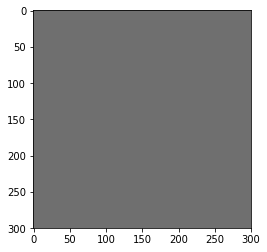

In [47]:
blanc.fill(111)
print(blanc)
cv_show(blanc)


## Draw a blue square on a gray scale image ..??

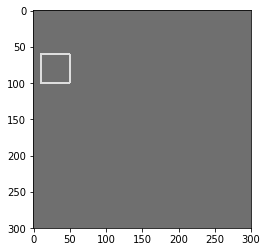

In [48]:
img_copy = blanc.copy()
  
# Using the rectangle() function to create a rectangle.
rectangle = cv.rectangle(img_copy, (10, 60), 
                          (50, 100), (222, 33, 22), 2)
cv_show(rectangle)


## Creating a blanc color image and drawing on it


[[[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 ...

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]]


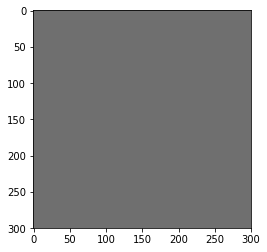

In [49]:
blanc = np.zeros((300,300,3),dtype=np.uint8)
blanc.fill(111)
print(blanc)
cv_show(blanc)


now lets draw a blue rectangle in our image

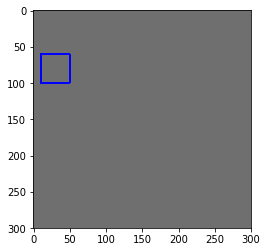

In [50]:
img_copy = blanc.copy()
  
# Using the rectangle() function to create a rectangle.
cv.rectangle(img_copy, (10, 60), 
                          (50, 100), (255, 0, 0), 2)
cv_show(img_copy)

# Changing pixel values with slicing
now lets change the color of the half of the image

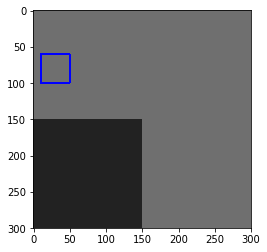

In [51]:
img_copy[150:,:150]=34
cv_show(img_copy)

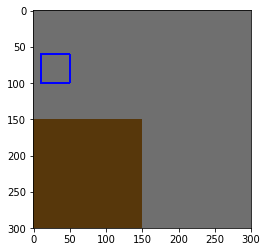

In [52]:
img_copy[150:,:150]=(11,55,87)
cv_show(img_copy)

## Working with color Planes


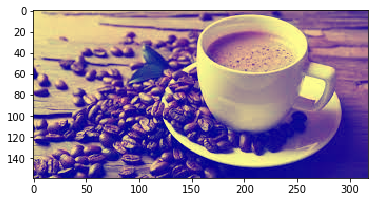

In [53]:
copy = img.copy()
#Chainging the Blue color compnent of the image
copy[:,:,0]=144
cv_show(copy)
